# Customer Churn Analysis

### Importing the libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

### Importing the dataset

In [59]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

### Displaying the first five rows of the dataset to get an idea of how the dataset looks like

In [60]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Describing the data

In [61]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Checking type of data and missing values

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


- **The dataset is spick and span CLEAN! :D**

### Checking the number of rows and columns in the dataset

In [63]:
df = df.set_index('customer_id') #doing this because customer_id is unique to every person

In [64]:
df.shape

(10000, 11)

- There are **10000 rows and 11 columns**

### Visualizing the dataset

<AxesSubplot:ylabel='customer_id'>

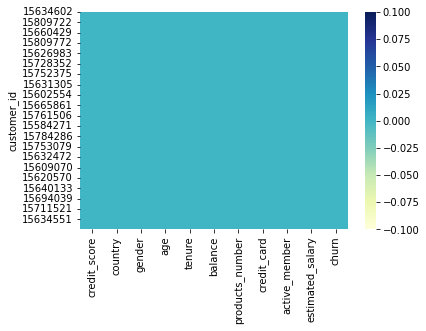

In [65]:
sns.heatmap(df.isnull(), cmap = "YlGnBu") 

### Exploratory Data Analysis

##### Checking rows consisting of data with only females

In [66]:
df[df['gender']=='Female']

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15768163,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0


- There are 4543 rows out of 10000, which are of females.

##### Checking rows consisting of data with only males

In [67]:
df[df['gender']=='Male']

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
15767821,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
...,...,...,...,...,...,...,...,...,...,...,...
15657105,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
15569266,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0


- There are 5457 rows out of 10000, which are of females.

##### Relationship/Correlation of columns with each other

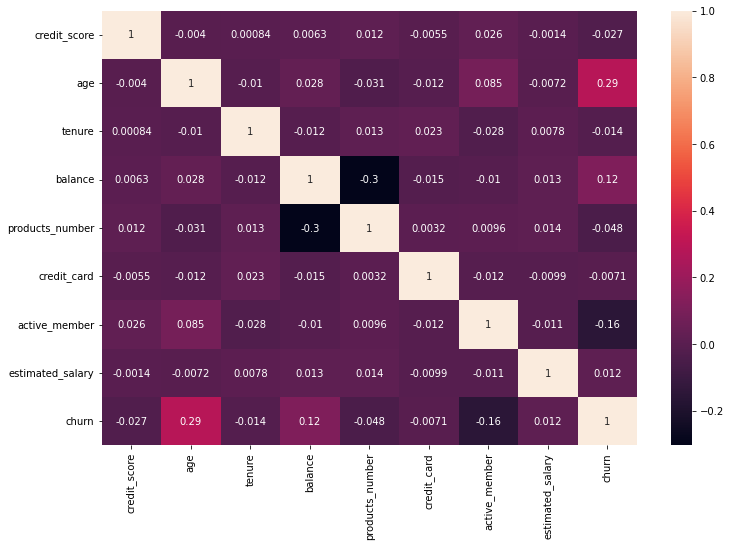

In [68]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12 ,8))
sns.heatmap(corr,xticklabels = corr.columns, yticklabels = corr.columns
           ,annot = True)
plt.show()

**Observation:** Age has the highest positive correlation with the Churned Customers. Hence we can say that older customers are more likely to churn than the younger ones, as most of the data is filled with people who are of age 33-40.

##### Visualizing the number of people belonging to specific country

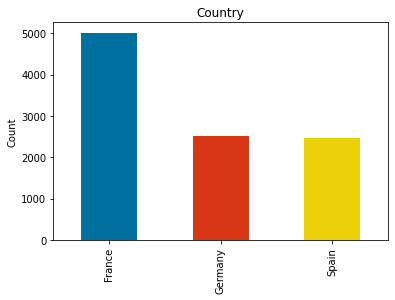

In [69]:
df['country'].value_counts().plot(kind = 'bar' , title = "Country" , ylabel = 'Count',color=['#0070a0','#D73715','#ECD109'])
plt.show()

**Observation:** Most of the people are from France, then Germany and then the least number of people belong to Spain.

##### Visualizing the number of people belonging to specific gender

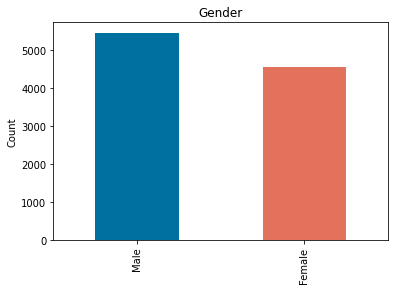

In [70]:
df['gender'].value_counts().plot(kind = 'bar' , title = "Gender" , ylabel = 'Count',color=['#0070a0','#e2725b'])
plt.show()

**Observation:** There are more male than female customers in the bank.

##### Visualizing the age groups (both genders included) of customers

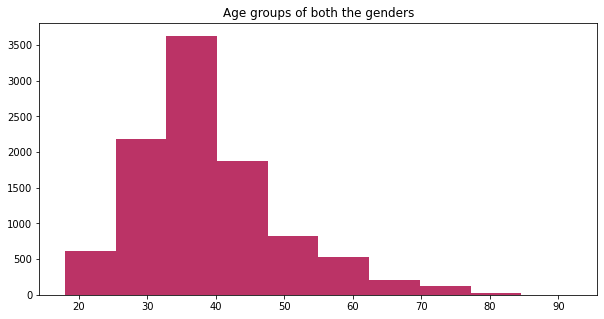

In [71]:
plt.figure(figsize = (10,5))
plt.title('Age groups of both the genders')
plt.hist(df.age,bins=10,color='#bb3366')
plt.show()

**Observation:** People mostly belong to the age group of 33-40 yrs old.

##### Visualizing the count of Active/Inactive members

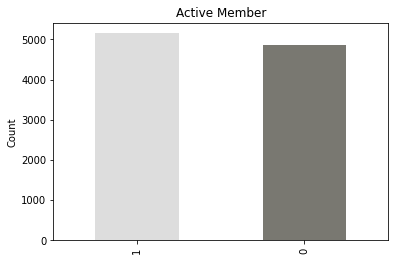

In [72]:
df['active_member'].value_counts().plot(kind = 'bar' , title = 'Active Member' , ylabel = 'Count',color=['#DDDDDD','#797871'])
plt.show()

**Observation:** There's almost equal amounts of data of Active and Inactive members.

##### Visualizing the count of people with or without credit card

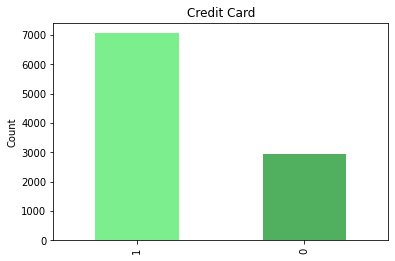

In [73]:
df['credit_card'].value_counts().plot(kind = 'bar' , title = "Credit Card" , ylabel = 'Count',color=['#7CEE8D','#51B05F'])
plt.show()

**Observation:** Most of the customers own a credit card.

##### Visualizing the count of people owning which type of product

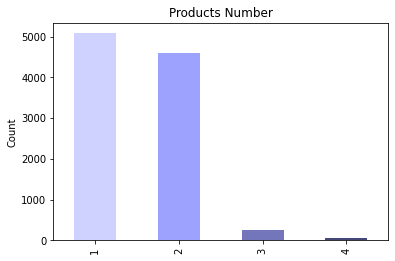

In [74]:
df['products_number'].value_counts().plot(kind = 'bar' , title = "Products Number" , ylabel = 'Count',color=['#CFD2FF','#9EA2FF','#7376BA','#454778'])
plt.show()

**Observation:** Most of the customers own the product type **1**.

##### Visualizing the count of churn

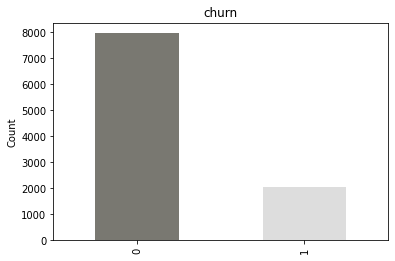

In [75]:
df['churn'].value_counts().plot(kind = 'bar' , title = "churn" , ylabel = 'Count',color=['#797871','#dddddd'])
plt.show()

**Observation:** There's a class imbalance, means that majority don't churn.

##### Visualizing the relationship between churn and credit card

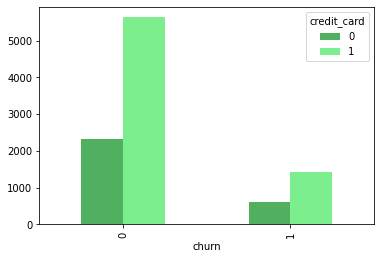

In [76]:
df.groupby(['churn','credit_card']).size().unstack().plot(kind='bar',color=['#51B05F','#7CEE8D'])
plt.show()

**Observation:** Majority of the customers who own credit cards don't churn.

##### Visualizing the relationship between churn and active member

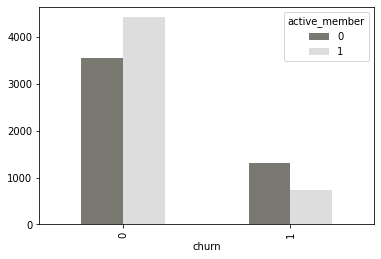

In [77]:
df.groupby(['churn','active_member']).size().unstack().plot(kind='bar',color=['#797871','#dddddd'])
plt.show() #active members churn less

**Observation:** Majority of the active members don't churn, whereas inactive members do mostly.

##### Visualizing the relationship between churn and country

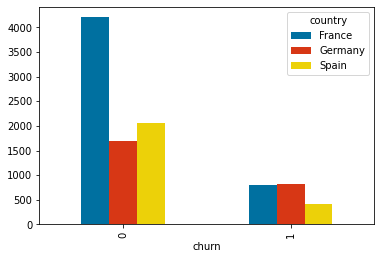

In [78]:
df.groupby(['churn','country']).size().unstack().plot(kind='bar',color=['#0070a0','#D73715','#ECD109'])
plt.show()

**Observation:** 
- Majority of the customers belonging to France don't churn, as compared to other countries.
- Least number of customers belonging to Spain churn, whereas customers from Germany tend to churn.

##### Visualizing the relationship between churn and gender

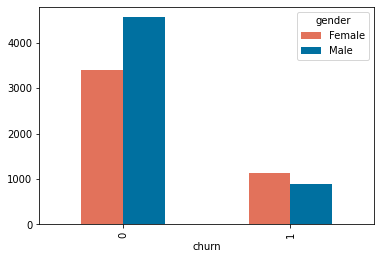

In [79]:
df.groupby(['churn','gender']).size().unstack().plot(kind='bar',color=['#e2725b','#0070a0'])
plt.show()

**Observation:** 
- Majority of the males don't churn.
- Females churn more than males.